In [5]:
#Librerias
import numpy as np
import scipy as sp
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import matplotlib.pyplot as plt

#Projectile Motion (WITH AIR FRICTION)

La fuerza neta que se ejerce sobre una partícula en movimiento en gravedad y con fricción del aire es:
$$\vec{F}_{net}=\vec{F}_{g}+\vec{F}_{g}=-mg\hat{y}-b|\vec{v}|\vec{v} $$
y note que $\vec{v}=\dot{x}\hat{x}+\dot{y}\hat{y}$ se obtiene:
$$\vec{F}_{net}= -mg\hat{y}-b\sqrt{\dot{x}^2+\dot{y}^2}(\dot{x}\hat{x}+\dot{y}\hat{y})$$ 
O en su forma vectorial
$$ $$


In [8]:
#Definir la función f que se encuentra arriva

def dSdt(t,S,B):
  x, vx, y, vy = S
  return[vx,
         -B*np.sqrt(vx**2+vy**2)*vx,
         vy,
         -1-B*np.sqrt(vx**2+vy**2)*vy]

Definir la fricción **B**, la inicial velocidad **V** y algunos angulos **t1**,**t2**,**t3** 

In [9]:
B = 1
V = 1
t1= 40*np.pi/180
t2= 45*np.pi/180
t3= 50*np.pi/180

Resolver la ODE usando scipy's **solve_ivp** method. La función toma en

In [11]:
sol1 = solve_ivp(dSdt, [0, 2], y0=[0, V*np.cos(t1), 0, V*np.sin(t1)], t_eval=np.linspace(0,2,1000), args=(B,))
sol2 = solve_ivp(dSdt, [0, 2], y0=[0, V*np.cos(t2), 0, V*np.sin(t2)], t_eval=np.linspace(0,2,1000), args=(B,))
sol3 = solve_ivp(dSdt, [0, 2], y0=[0, V*np.cos(t3), 0, V*np.sin(t3)], t_eval=np.linspace(0,2,1000), args=(B,))

Graficar algunas de las soluciones

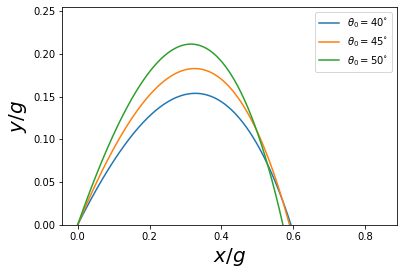

In [13]:
plt.plot(sol1.y[0],sol1.y[2], label=r'$\theta_0=40^{\circ}$')
plt.plot(sol2.y[0],sol2.y[2], label=r'$\theta_0=45^{\circ}$')
plt.plot(sol3.y[0],sol3.y[2], label=r'$\theta_0=50^{\circ}$')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('$x/g$', fontsize=20)
plt.ylabel('$y/g$', fontsize=20)
plt.show()

La función distancia $x/g$ que el balón viaja antes de golpear el suelo cuando viaja a una velocidad inicial **V**

In [15]:
def get_distance(angle, B, V=1, t=2):
  v0x = V*np.cos(angle*np.pi/180)
  v0y = V*np.sin(angle*np.pi/180)
  sol = solve_ivp(dSdt, [0, t], y0=[0, v0x,0,v0y], t_eval=np.linspace(0,t,100000), args=(B,), atol=1e-7, rtol=1e-4)
  just_above_idx = np.where(np.diff(np.sign(sol.y[2])) <0)[0][0]
  just_below_idx = just_above_idx +1
  x_loc = (sol.y[0][just_above_idx]+ sol.y[0][just_below_idx])/2
  return x_loc

Mirar los dos casos abajo

In [16]:
print(f'Launch angle 45 degrees distance travelled: {get_distance(45, B=1, V=1)}')
print(f'Launch angle 40 degrees distance travelled: {get_distance(40, B=1, V=1)}')

Launch angle 45 degrees distance travelled: 0.589013953568656
Launch angle 40 degrees distance travelled: 0.5933358775195945


Encontrar la distancia para ambos ángulos.

In [17]:
angles = np.linspace(30,60,200)
x_locs = np.vectorize(get_distance)(angles, B=1)

Grafique las distancias viajadras antes de golpear el suelo sobre unos diferentes iguales para una Velocidad=1.

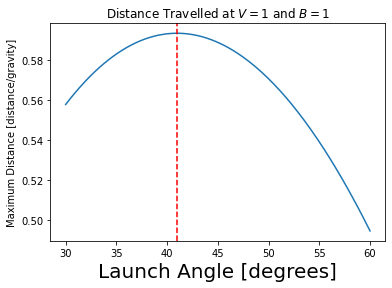

In [18]:
plt.plot(angles, x_locs)
plt.xlabel('Launch Angle [degrees]', fontsize=20)
plt.ylabel('Maximum Distance [distance/gravity]')
plt.axvline(angles[np.argmax(x_locs)], ls='--', color='r')
plt.title('Distance Travelled at $V=1$ and $B=1$')
plt.show()

Encontrar el ángulo que da la máxima distancia como función de **B**. Obtendremos para ambos valores de velocidad V=1 y V=2.

In [19]:
V1 = 1
V2 = 2
angles = np.linspace(35, 45, 200)
Bs =  np.linspace(0, 1, 50)

results_v1 = [np.vectorize(get_distance)(angles, B=B, V=V1) for B in Bs]
opt_angles_v1 = [angles[np.argmax(result)] for result in results_v1]
results_v2 = [np.vectorize(get_distance)(angles, B=B, V=V2, t=6) for B in Bs]
opt_angles_v2 = [angles[np.argmax(result)] for result in results_v2]


Graficando los resultados.

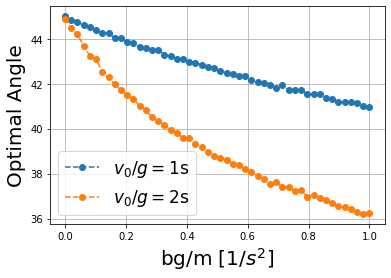

In [20]:
plt.plot(Bs, opt_angles_v1, 'o--', label='$v_0/g=1$s')
plt.plot(Bs, opt_angles_v2, 'o--', label='$v_0/g=2$s')
plt.legend(fontsize=17)
plt.xlabel('bg/m [1/$s^2$]', fontsize=20)
plt.ylabel('Optimal Angle', fontsize=20)
plt.grid()

Cómo esto corresponde a objetos regulares? Miremos un balón de fútbol:


In [21]:
rho = 1.225
g = 9.81

# Golf
r = 0.021
Cd = 0.5
m = 0.045
B_golf = 0.5 * rho * np.pi * r**2 * Cd * g /m

# Soccer
r = 0.22 / 2
Cd = 0.2
m = 0.45
B_soc = 0.5 * rho * np.pi * r**2 * Cd * g /m

Plot the results next to the values of  for the soccer and golf ball. Note that  corresponds to kicking a soccer ball at  which is representative of a true soccer kick:

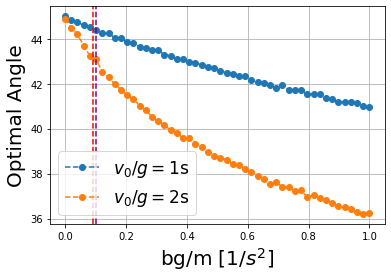

In [22]:
plt.plot(Bs, opt_angles_v1, 'o--', label='$v_0/g=1$s')
plt.plot(Bs, opt_angles_v2, 'o--', label='$v_0/g=2$s')
plt.legend(fontsize=17)
plt.xlabel('bg/m [1/$s^2$]', fontsize=20)
plt.ylabel('Optimal Angle', fontsize=20)
plt.grid()
plt.axvline(B_golf, ls='--', color='r')
plt.axvline(B_soc, ls='--', color='purple')